In [1]:
import torch
import pandas as pd
import numpy as np
import seaborn as sns
import os
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from glob import glob
%matplotlib inline

In [2]:
def get_title(filename):
    """
     >>> get_title("logs/0613/0613-q1-0000.train")
     '0613-q1-0000'
     """
    return os.path.splitext(os.path.basename(filename))[0]
def get_df_from_file(f):
    df = pd.read_csv(f)
    df = df[df["is_end_of_epoch"]].reset_index()
    return df

In [12]:
result_files = sorted(glob("../../../data/logs/0708*.train"))
titles = [get_title(f) for f in result_files]
dfes = (get_df_from_file(f) for f in result_files)

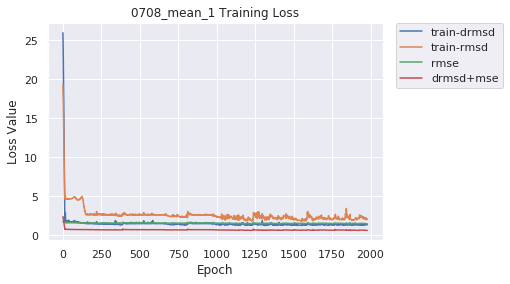

In [13]:
def do_plot(df, title):
    dfval = df[df["is_val"]]
    dftrain = df[df["is_val"] != True]
    sns.lineplot(x=dftrain.index, y="drmsd", data=dftrain, label="train-drmsd")
    sns.lineplot(x=dfval.index, y="drmsd", data=dfval, label="val-drmsd",color="lightblue")
    sns.lineplot(x=dftrain.index, y="rmsd", data=dftrain, label="train-rmsd")
    sns.lineplot(x=dfval.index, y="rmsd", data=dfval, label="val-rmsd", color="orange")
    sns.lineplot(x=dftrain.index, y="rmse", data=dftrain, label="rmse")
    sns.lineplot(x=dftrain.index, y="combined", data=dftrain, label="drmsd+mse")
    plt.ylabel("Loss Value")
    plt.xlabel("Epoch")
    plt.legend(loc=(1.04,.7))
    plt.title("{} Training Loss".format(title))
#     plt.savefig("../figs/transtrain.pdf", pad_inches=1, bbox_inches="tight")
do_plot(get_df_from_file(result_files[0]), titles[0])

In [14]:
min_key = "rmsd"
mins = []
for df, title in zip(dfes, titles):
    try:
        dfval = df
    except KeyError as e:
        print(e)
        continue
    try:
        row = dfval[dfval[min_key] == dfval[min_key].min()]
    except KeyError:
        print(title)
        continue
    row["title"] = title[:]
    mins.append(row)
mins_df = pd.concat(mins)
mins_df.sort_values(min_key, inplace=True)
mins_df

/home/jok120/build/anaconda3/envs/pytorch_src2/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0708_mean_13


,index,drmsd,rmse,rmsd,combined,lr,is_val,is_end_of_epoch,time,title
2043,4086,1.240297,1.451762,1.659794,0.604422,0,False,True,1.562746e+09,0708_rand_8
1464,2928,1.328245,1.459405,1.731094,0.615481,0,False,True,1.562714e+09,0708_mean_2
1651,3302,1.340640,1.439471,1.749610,0.601809,0,False,True,1.562738e+09,0708_mean_7
2431,4862,1.352220,1.516018,1.761066,0.659091,0,False,True,1.562731e+09,0708_mean_5
2274,4548,1.377235,1.441664,1.793686,0.605676,0,False,True,1.562726e+09,0708_mean_4
2748,5496,1.217645,1.362632,1.801044,0.540294,0,False,True,1.562757e+09,0708_mean_11
1550,3100,1.311957,1.541532,1.807429,0.676078,0,False,True,1.562709e+09,0708_mean_1
1539,3078,1.424697,1.528541,1.824070,0.673153,0,False,True,1.562763e+09,0708_mean_12
1461,2922,1.315749,1.552453,1.873807,0.684762,0,False,True,1.562753e+09,0708_mean_10
1207,2414,1.406932,1.391346,1.887108,0.571894,0,False,True,1.562751e+09,0708_rand_9


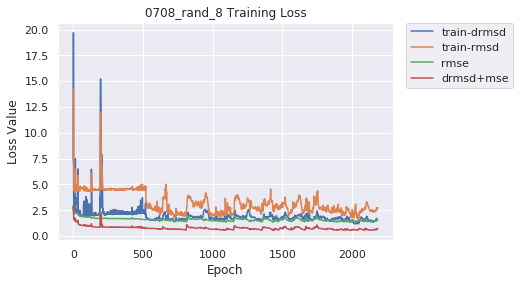

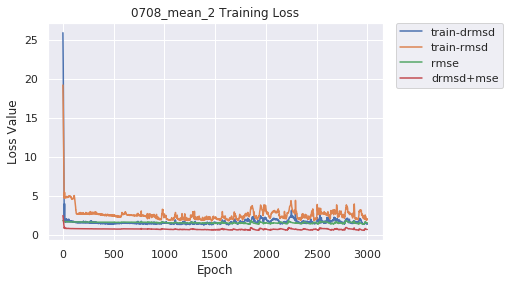

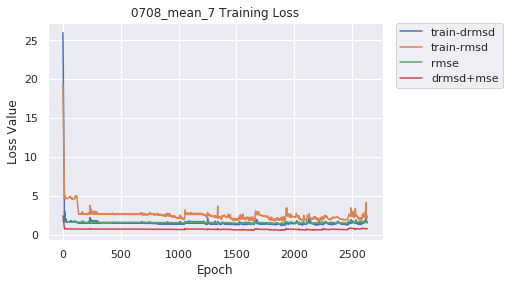

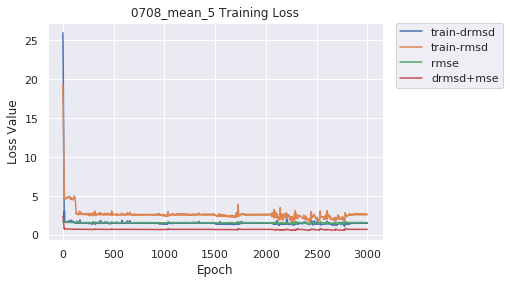

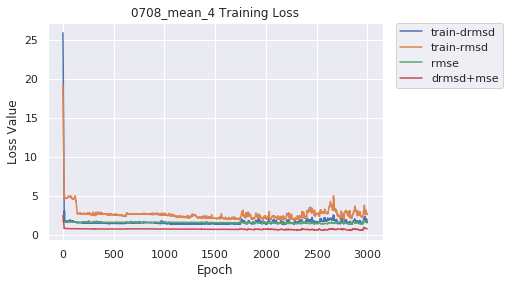

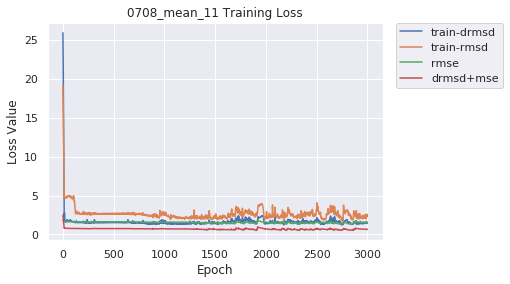

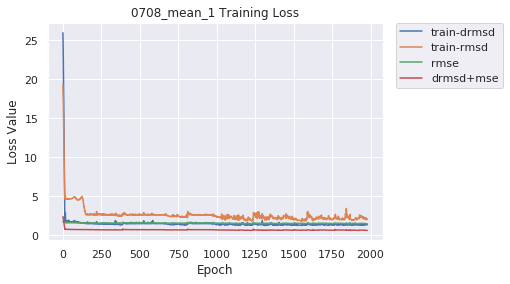

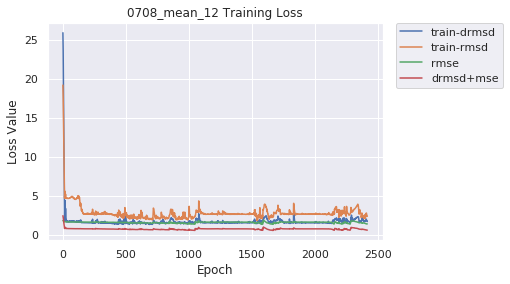

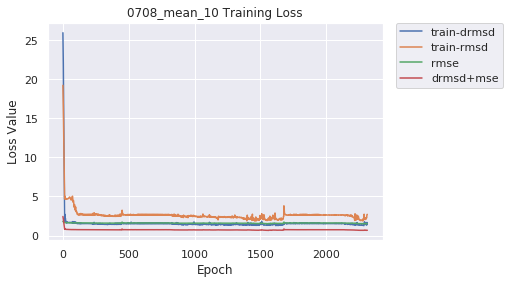

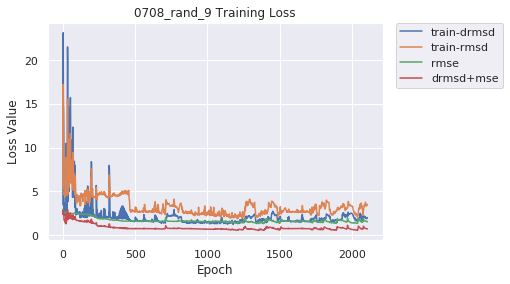

In [15]:
names =  [t for t in mins_df["title"][:10]]
for n in names:
    loc = None
    for i in range(len(result_files)):
        if n == os.path.splitext(os.path.basename(result_files[i]))[0]:
            loc = i
    do_plot(get_df_from_file(result_files[loc]), titles[loc])
    plt.show()

In [16]:
mean_rmsds = mins_df[mins_df["title"].str.contains("mean")]["rmsd"].values
rand_rmsds = mins_df[mins_df["title"].str.contains("rand")]["rmsd"].values
mean_rmsds

array([1.73109383, 1.74961026, 1.76106559, 1.79368592, 1.80104446,
       1.80742908, 1.82407007, 1.87380727, 1.89277045, 2.04671556,
       2.26293898, 2.37891054])

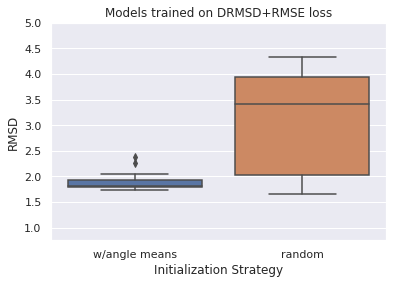

In [45]:
sns.boxplot(x=["w/angle means", "random"], y=[mean_rmsds, rand_rmsds])
plt.ylabel("RMSD")
plt.xlabel("Initialization Strategy")
plt.ylim((.75, 5))
plt.title("Models trained on DRMSD+RMSE loss")
plt.savefig("model_overfit_initialization_strategies_combined.png",dpi=300)
plt.savefig("model_overfit_initialization_strategies_combined.svg")

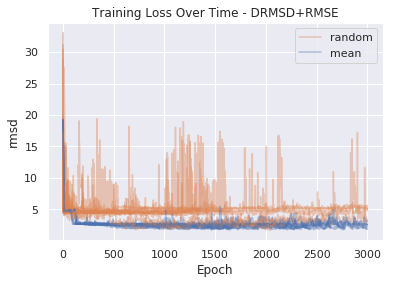

In [46]:
dfes_mean = (get_df_from_file(f) for f in result_files if "mean" in f)    
dfes_rand = (get_df_from_file(f) for f in result_files if "rand" in f)
first = True
for dm, dr in zip(dfes_mean, dfes_rand):
    if first:
        lr = "random"
        lm = "mean"
        first = False
    else:
        lr = None
        lm = None
    try:
        sns.lineplot(x=dr.index, y="rmsd", data=dr, alpha=0.4, color="C1", label=lr)
    except ValueError:
        pass
    try:
        sns.lineplot(x=dm.index, y="rmsd", data=dm, alpha=0.4, color="C0", label=lm)
    except ValueError:
        continue
plt.legend()
plt.title("Training Loss Over Time - DRMSD+RMSE")
plt.xlabel("Epoch")
plt.savefig("mean_vs_random_training_over_time_combined.png", dpi=300)
plt.savefig("mean_vs_random_training_over_time_combined.svg")